 # <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://www.nicepng.com/png/full/204-2043038_white-lightbulb-icon-light-bulb-icon-white.png" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%">   Kalman Filtering</span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```Kalman filter```, ```Python```, ```Signal Processing```, ```Low-pass Filters```

# I. Introduction
<br>
<div class="title"style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>

## <div style="color:#00a0e4"> 1. Objectives</div>
* Understand the theoretical principles behind Kalman filtration.
* Understand how to implement a Kalman filter in Python.
* Understand the possible applications for this type of processing.

## <div style="color:#00a0e4"> 2. Theory </div>


In signal processing, filters are one of the most valuable tools available, as they allow for the extraction of valuable information from signals, as well as the removal of unwanted noise. Kalman filtering is a type of low pass filtering quite useful for various applications, particularly for signal smoothing and the removal of noise.

More specifically, Kalman filtration is an algorithm that aims to provide estimates for unknown variables, given measurements over a time frame, in order to provide accurate approximations of current states. It provides a recursive solution to the least-mean-squares method without explicitly solving the problem of the minimization of errors. It is comprised by two parts, prediction and update. 

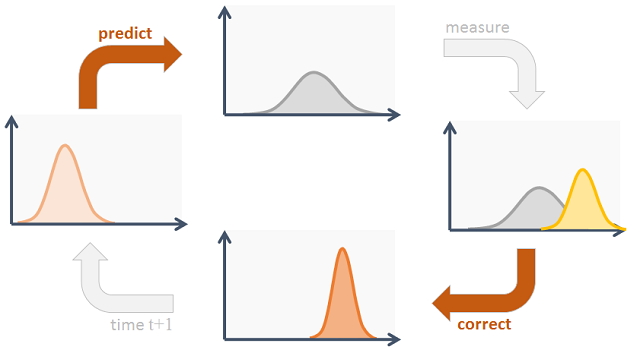

*Image: Illustration of Kalman filtering stages. [Source](https://www.codeproject.com/Articles/865935/Object-Tracking-Kalman-Filter-with-Ease)*

The prediction consists of estimating the current state _xhat_ using the previous state xhat-, and determining the error covariance of the current state _P(k)_ by adding a tuning parameter _Q_ to the previous state's error covariance _P-(k)_.
        

xhat-(k)=xhat(k-1)
 
P-(k)=P(k-1) 

        
The update consists of the calculation of the Kalman gain K(k) using P-(k) and a tuning parameter R and a posteriori estimates of the current state using the current measurement y(k) and the Kalman gain, and error covariance using K(k) and P-(k):
        
K(k)=P-(k)/P-(k)+R
 
xhat(k)=xhat-(k)+K(k)*y(k)-xhat-(k)
 
P(k)=(1-K(k))*P-(k)      
        
The output of the filter, corresponds to the value of xhat(k).

# II. Implementation

<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

The previous algorithm can be implemented in Python with the following code:

In [4]:
def kalman(z):
    n_iter = len(z)
    sz = (n_iter,) # size of array
    
    # variable parameters, adjust to calibrate the cutoff frequency, i.e. the level of smoothing
    Q = 1e-5 # process variance
    R = 0.5 # estimate of measurement variance, change to see effect
    
    xhat=[] 
    P=[] 
    xhatminus=[] 
    Pminus=[] 
    K=[]
    y=[] 
    cont=0

    while cont<=n_iter-1: 
        xhat.append(0) 
        P.append(0) 
        xhatminus.append(0) 
        Pminus.append(0) 
        K.append(0) 
        y.append(cont) 
        cont=cont+1
        
        # intial guesses 
        xhat[0] = 2320
        P[0] = 2320
        
        for k in range(1,n_iter):
            # time update
            xhatminus[k] = xhat[k-1]
            Pminus[k] = P[k-1]+Q
            # measurement update
            K[k] = Pminus[k]/( Pminus[k]+R )
            xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k]) 
            P[k] = (1-K[k])*Pminus[k]
    return (xhat)

# Source: Bruno Miguel Agostinho dos Santos Pereira, "Sistema de aquisição de sinais biomédicos baseado 
# num telefone celular - Aplicação na estimação da temperatura Central para determinação do ciclo circadiano do sono,", 
# Master's Thesis in Biomedical Engineering, Instituto Superior Técnico, Lisboa 

You can adjust the tuning parameters Q and R according to how strong the filter should be, and the initial guesses xhat(0) and P(0) according to what the initial values of xhat and P should be.

# III. Applications and Examples

<div style="width:100%; background:#00a0e4;color:#282828;font-family:'arial black'; text-align: center; padding: 7px 0; border-radius: 5px 50px; margin-top:-15px" > </div>

#### <div style="color:#00a0e4">   3.1. Applications and Examples  </div>

As was previously mentioned, this filter is particularly useful for applications that require smoothing of signals and removal of noise. 

For instance, it can be used to assist the navigation of vehicles such as self-driving cars, aircraft and spacecraft. It is also used often in economics.

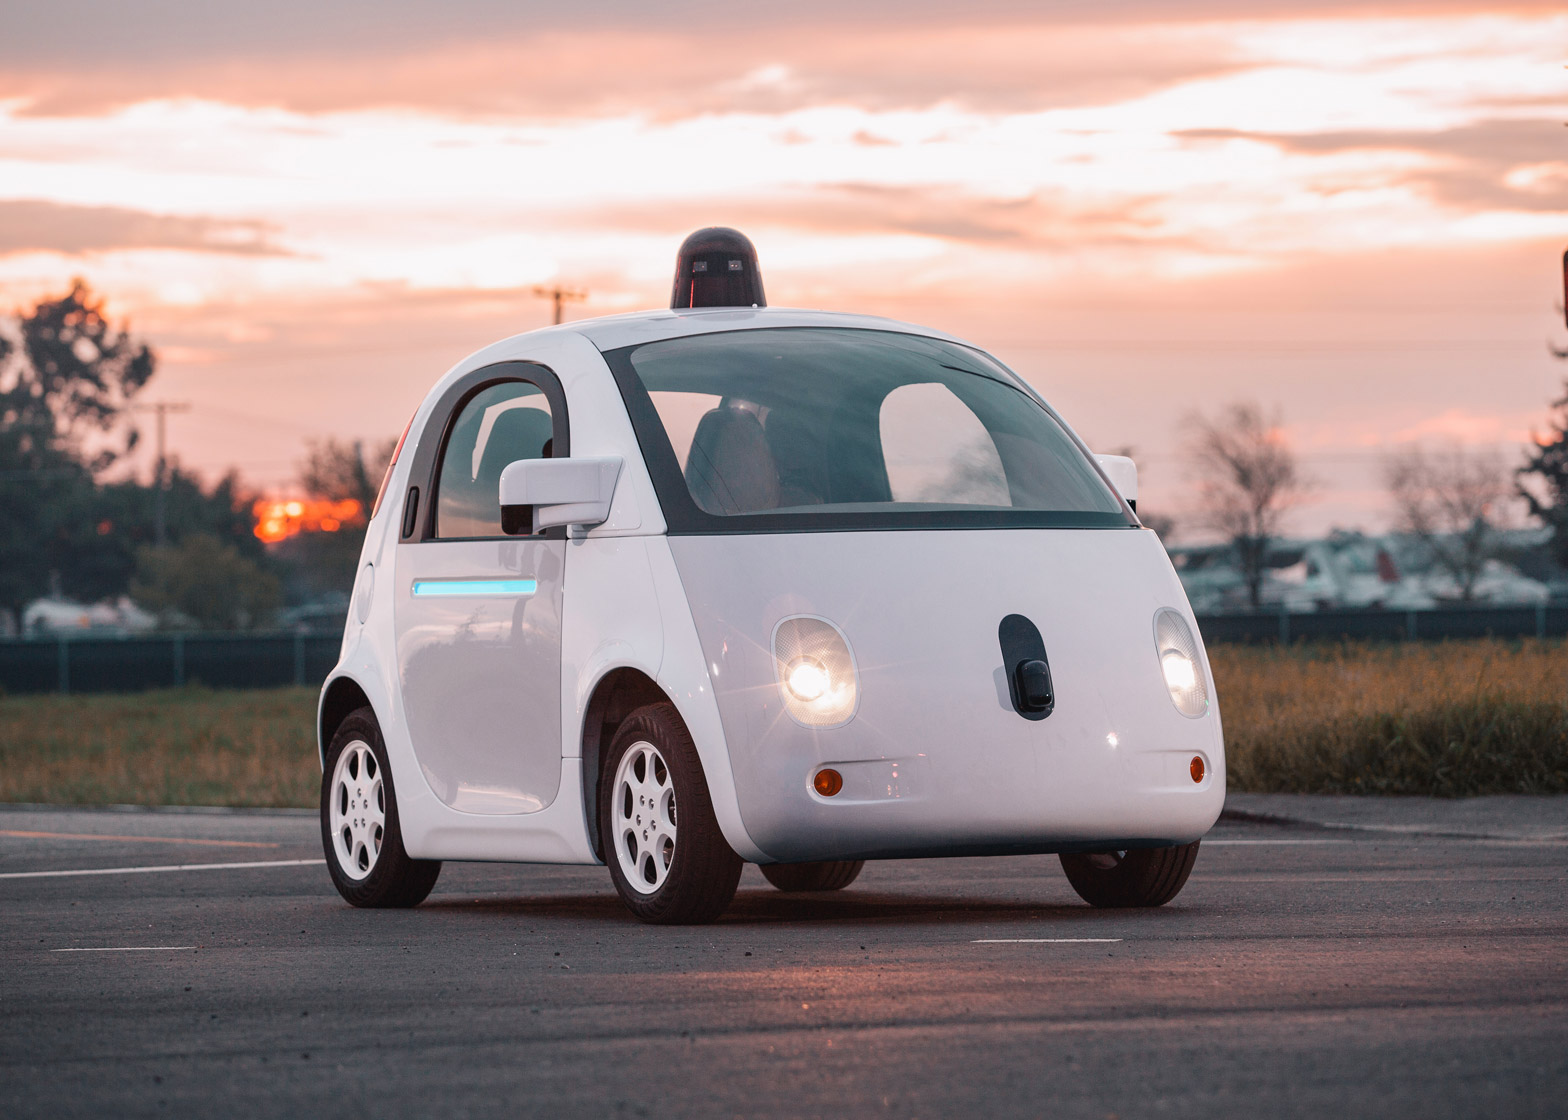

*Image: self-driving cars use Kalman filtration to aid navigation. Source: Google*

In the context of Biomedical Engineering, Kalman filtering is used in brain computer interfaces and nuclear medicine, and can be used to smooth physiological signals such as photoplethysmography (PPG) signals or the body temperature of an individual measured every second by an infrared thermometer. 

These types of signals often have high frequency noise caused by the device used to acquire the signal, or by small random fluctuations in the signal itself, irrelevant for the overall physiological analysis.

An example of such an application can be observed in the following figure.

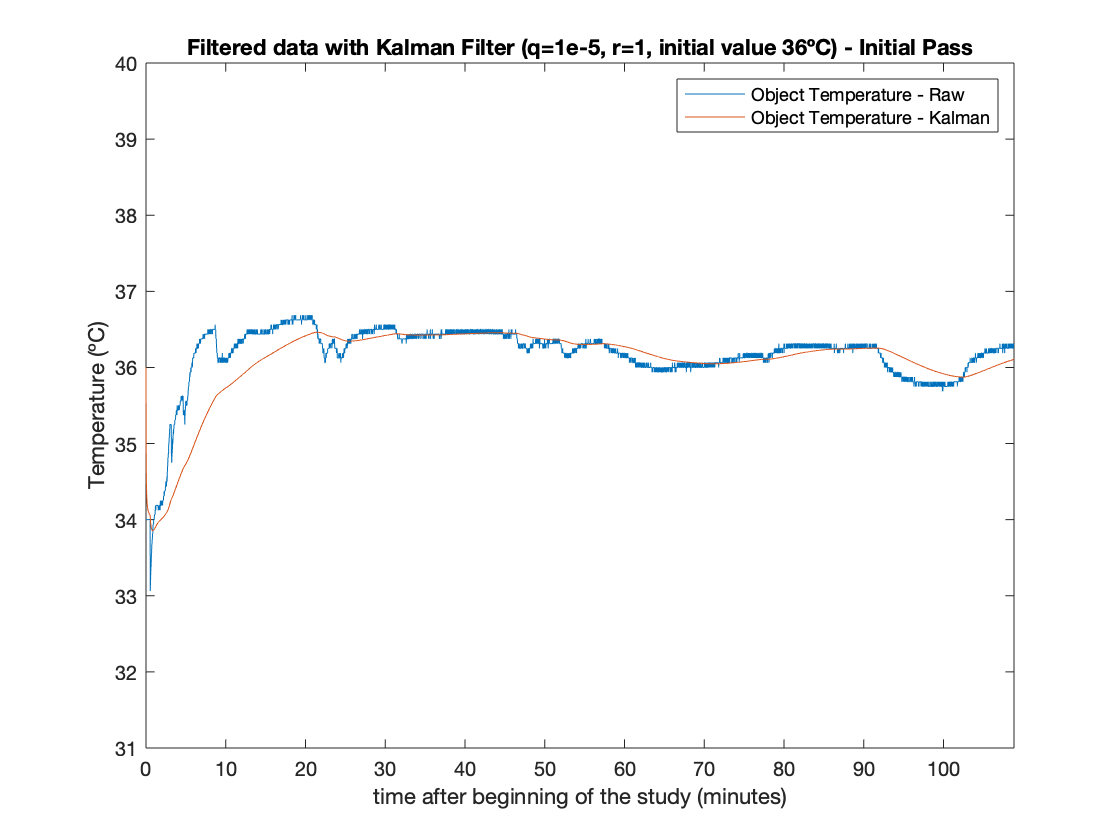

*Image: Body temperature measurement using an integrated circuit temperature sensor, filtered with a Kalman filter.*

As it can be observed, this filter, much like most filters, introduces some noticeable delay. In this particular application, a 5 minute delay is not relevant, as body temperature tends to vary in larger time intervals, but it is important to take this in mind.

#### <div style="color:#00a0e4">   3.2. Related notebooks  </div>

You can see a more detailed explanation of this application in the following notebook:  <br>
[Kalman and IIR Filtering for Body Temperature Measurements](../Continuous_Thermometer/Continuous-Temperature-Measurement.ipynb) <br>

#### <div style="color:#00a0e4">   3.3. Notes and Warnings  </div>

<div style="background:#fada5e;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Warning! </span> <br>
  <div style="background:#fff3c4;font-size:12px"> 
    Filters can introduce delay. Make sure to compensate for this with a time shift if the delay is relevant to the signal.
</div>

<div style="background:#00bfc2;font-family:'arial', monospace; text-align: center; padding: 10px 0; border-radius:10px; width:70%; margin:auto " >
  <span style="font-size:20px;position:relative;color:white; ">  Note </span> <br>
  <div style="background:#9eddde;font-size:12px"> 
    You can adjust the tuning parameters Q and R and the initial values of xhat and P to adjust the filter's strength.
</div>

<div style="height:115px; background:white;border-radius:10px;text-align:center"> 

<img src="https://www.lx.it.pt/~asmc/predict/images/IT.png" alt="it" style="position: relative; margin-left: 10px; bottom:-55px;max-width:150px;height:auto;"/> 
<img src="https://cqe.tecnico.ulisboa.pt/files/files/logos/IST_A_RGB_POS.png"
         alt="alternate text" 
         style="position: relative; margin-left: 10px;  bottom:-50px; width:150px;height:auto;"/>
</div> 

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> [here](https://forms.gle/C8TdLQUAS9r8BNJM8)</span>.</span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Rita Silva; Vicente Garção```